# Fight dataset 2008
## by Franz Tseng

## Preliminary Wrangling

> The data contains 2389217 rows of data and 29 features about fight information in the year of 2008 .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> The 2008.csv dataset is still too large considering the RAM i have, therefore, I removed 14 features, which I won't use for the analysis, and save the neww dataset with 15 features as "flight2008.csv" for later use.

In [2]:
variables = pd.read_csv("variable-descriptions.csv", header = 2, index_col=0)
variables

,Name,Description
1,Year,1987-2008
2,Month,12-Jan
3,DayofMonth,31-Jan
4,DayOfWeek,1 (Monday) - 7 (Sunday)
5,DepTime,"actual departure time (local, hhmm)"
6,CRSDepTime,"scheduled departure time (local, hhmm)"
7,ArrTime,"actual arrival time (local, hhmm)"
8,CRSArrTime,"scheduled arrival time (local, hhmm)"
9,UniqueCarrier,unique carrier code
10,FlightNum,flight number


In [20]:
variables.iloc[22, 1]

'reason for cancellation (A = carrier, B = weather, C = NAS, D = security)'

In [26]:
df = pd.read_csv("2008.csv")

In [27]:
df.shape

(2389217, 29)

In [28]:
# Delete features I am not interested to reduce the feature space and reduce RAM usage
df.drop(columns = ["Year", "DayofMonth", "ArrTime", "CRSArrTime", "FlightNum", "TailNum", 
                   "ActualElapsedTime", "CRSElapsedTime", "DepTime", "CRSDepTime", "AirTime",  
                   "Distance", "TaxiIn", "TaxiOut"], inplace=True)

In [29]:
df.shape

(2389217, 15)

In [31]:
df.to_csv("flight2008.csv", index=False)

In [2]:
df = pd.read_csv("flight2008.csv")

In [4]:
df.shape

(2389217, 15)

In [5]:
df.info()# the data type seems good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayOfWeek          int64  
 2   UniqueCarrier      object 
 3   ArrDelay           float64
 4   DepDelay           float64
 5   Origin             object 
 6   Dest               object 
 7   Cancelled          int64  
 8   CancellationCode   object 
 9   Diverted           int64  
 10  CarrierDelay       float64
 11  WeatherDelay       float64
 12  NASDelay           float64
 13  SecurityDelay      float64
 14  LateAircraftDelay  float64
dtypes: float64(7), int64(4), object(4)
memory usage: 273.4+ MB


In [6]:
# explore the numerical columns
df.describe()

,Month,DayOfWeek,ArrDelay,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.389217e+06,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2.505009e+00,3.909625e+00,1.027357e+01,1.143636e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,1.121493e+00,1.980431e+00,3.963429e+01,3.653229e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,1.000000e+00,1.000000e+00,-9.100000e+01,-9.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,2.000000e+00,-9.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,4.000000e+00,6.000000e+00,1.500000e+01,1.100000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,4.000000e+00,7.000000e+00,2.461000e+03,2.467000e+03,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [7]:
# explore categorical columns
Cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
for i, col in enumerate(Cat_cols):
    print(Cat_cols[i], df[col].nunique())
# Origin and Dest columns have very high cardinality

UniqueCarrier 20
Origin 291
Dest 293
CancellationCode 4


In [8]:
# detect any missing values
df.isnull().mean()
# a very high proportion of data are missing in "CancellationCode", "CarrierDelay", "WeatherDelay", "NASDelay", 
# "SecurityDelay", and "LateAircraftDelay"

Month                0.000000
DayOfWeek            0.000000
UniqueCarrier        0.000000
ArrDelay             0.029338
DepDelay             0.026972
Origin               0.000000
Dest                 0.000000
Cancelled            0.000000
CancellationCode     0.973028
Diverted             0.000000
CarrierDelay         0.755324
WeatherDelay         0.755324
NASDelay             0.755324
SecurityDelay        0.755324
LateAircraftDelay    0.755324
dtype: float64

### What is the structure of your dataset?

> The modified dataset(flight2008.csv) has 15 columns, most of which are numerical. The 4 categorical columns are 'UniqueCarrier', 'Origin', 'Dest', and 'CancellationCode'. However, 'Month', 'DayOfWeek', 'Cancelled', 'Diverted' columns are actually categorcial coloumns.

### What is/are the main feature(s) of interest in your dataset?

> The major interest is to ingastigate what features are most related to flight changes(Delay, Cancellation, Diversion).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I speculate that location(Dest, Origin) and time in the year(Month) might be most related to delay(especially weather delay).
> I'm also curious about if certain carriers are prone to delay. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

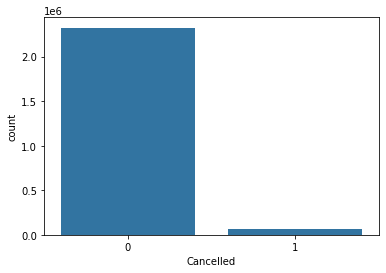

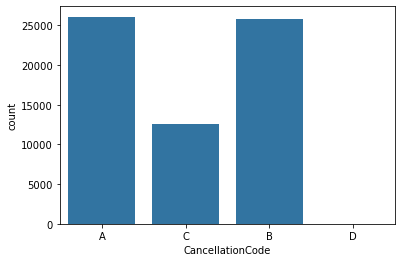

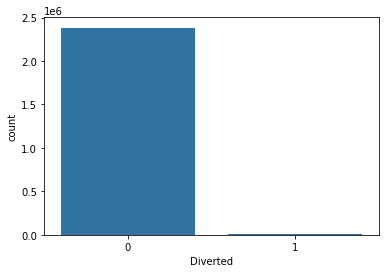

In [22]:
# the primary target of interest is if the flight is diverted, cancelled, or delayed. 
# I'll take a look at these categorical targets first
target1 = ["Cancelled", "CancellationCode", "Diverted"]
for var in target1:
    base_color = sb.color_palette()[0]
    fig, axes = plt.subplots()
    sb.countplot(data=df, x=var, color=base_color)

> Here we can see in "Diverted" and "Cancellation" columns, the data are highly imbalanced which make sense that most of the flights are not cancelled or diverted. As for the reason of cancellation, it looks like "Weather" and "Carrier" arer the major reason for cancellation

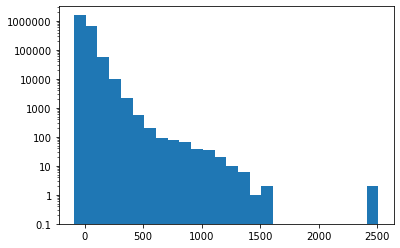

In [7]:
#target2 = ['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
# Then I'll explore other target variables
base_color = sb.color_palette()[0]
bins = np.arange(df.ArrDelay.min(), df.ArrDelay.max()+100, 100)
plt.hist(data=df, x='ArrDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [15]:
df.loc[df.ArrDelay > 2000]
# The data are highly skewed. At the very right side of the graph, I see outliers at aound 2500
# There are actually 2 outliers here with delay of 2461 min and 2453 min respectedly. 

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1018504,2,7,NW,2461.0,2457.0,HNL,MSP,0,NaN,0,1455.0,0.0,4.0,0.0,1002.0
2235384,4,4,NW,2453.0,2467.0,CLT,MSP,0,NaN,0,2436.0,0.0,0.0,0.0,17.0


In [23]:
df.loc[df.ArrDelay <= 0].shape[0]
# I also notice there are 1210094 rows of data are equal or smaller than 0 in this columns 
# which means the flight actually took off earlier or on time

1210094

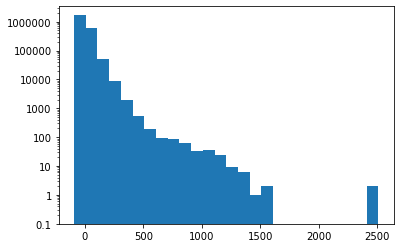

In [6]:
bins = np.arange(df.DepDelay.min(), df.DepDelay.max()+100, 100)
plt.hist(data=df, x='DepDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [16]:
df.loc[df.DepDelay > 2000]
# This column is extremely similar to 'ArrDelay' and the 2 outliers are the same data.
# From the numerical data description I can see that the statistics in the two columns are also very close.

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1018504,2,7,NW,2461.0,2457.0,HNL,MSP,0,NaN,0,1455.0,0.0,4.0,0.0,1002.0
2235384,4,4,NW,2453.0,2467.0,CLT,MSP,0,NaN,0,2436.0,0.0,0.0,0.0,17.0


In [24]:
df.loc[df.DepDelay <= 0].shape[0]
# Here is the same situation that 1331229 rows of data are smaller or equal 0 which means they were not delayed

1331229

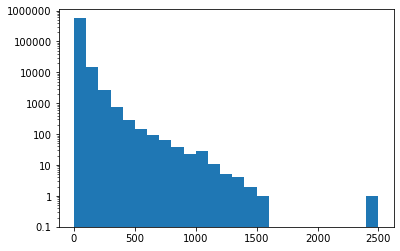

In [9]:
bins = np.arange(df.CarrierDelay.min(), df.CarrierDelay.max()+100, 100)
plt.hist(data=df, x='CarrierDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [29]:
df.loc[df.CarrierDelay == 0].shape[0]
# 325898 rows of data indicate the flight were on time 

325898

In [17]:
df.loc[df.CarrierDelay > 2000]
# This column is also very right skewed with one outliers which is one of the outliers in the previous twp columns 

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2235384,4,4,NW,2453.0,2467.0,CLT,MSP,0,NaN,0,2436.0,0.0,0.0,0.0,17.0


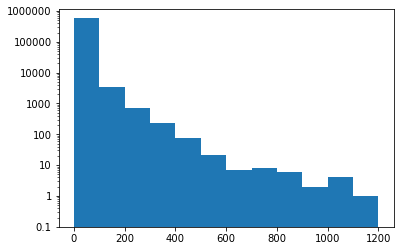

In [10]:
base_color = sb.color_palette()[0]
bins = np.arange(df.WeatherDelay.min(), df.WeatherDelay.max()+100, 100)
plt.hist(data=df, x='WeatherDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

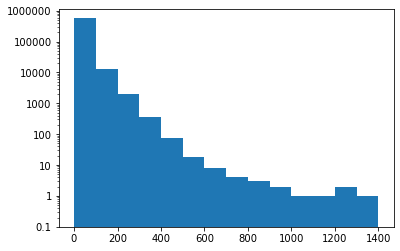

In [11]:
bins = np.arange(df.NASDelay.min(), df.NASDelay.max()+100, 100)
plt.hist(data=df, x='NASDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

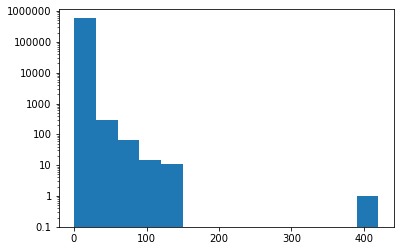

In [19]:
bins = np.arange(df.SecurityDelay.min(), df.SecurityDelay.max()+30, 30)
plt.hist(data=df, x='SecurityDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

In [20]:
df.loc[df.SecurityDelay > 300]
# One outlier of 392 is observed here.

,Month,DayOfWeek,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2116829,4,1,EV,392.0,405.0,SAT,ATL,0,NaN,0,0.0,0.0,0.0,392.0,0.0


In [21]:
df.loc[df.SecurityDelay == 0].shape

(581835, 15)

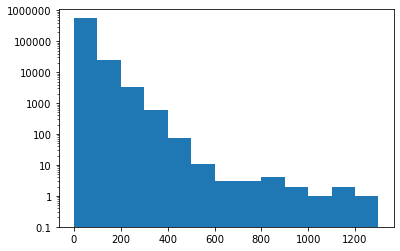

In [14]:
bins = np.arange(df.LateAircraftDelay.min(), df.LateAircraftDelay.max()+100, 100)
plt.hist(data=df, x='LateAircraftDelay', color=base_color, bins=bins)
plt.yscale("log")
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks,labels);

> For these numerical target variables, I noticed they are all right skewed even if I exclude the outliers. While these columns are highly right skewed, it shows that most of the flight are not delayed and have value of 0 or smaller. 
> From the previous analysis, I know 3/4 of the data are missing in 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', and 'LateAircraftDelay' columns. It's hard to know if these NaN mean no delay or simply not recorded because the column contains 0 that indicates on time.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!